In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import MeanSquaredError, MeanAbsoluteError
import tensorflow.keras.backend as K
import tensorflow as tf # Machine learning

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as pplt # New plot library (https://proplot.readthedocs.io/en/latest/)
pplt.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures
from scipy import stats


# Chargement des librairies + données
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

2024-01-12 17:15:03.110085: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_excel('../merged_data.xlsx')
df

,Red,Green,Blue,superficie_totale_drainee,agricole,forestier,humide,aquatique,anthropique,coupe_regenaration,...,p_t_per,ph,pheo,ss,temp,turb,durete,iqbp6,latitude,longitude
0,0.266133,0.338741,0.395126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.329250,NaN,3.015000,814.750000,NaN,NaN,NaN,50.500000,46.749694,-71.299333
1,0.230186,0.370447,0.399367,705.492,0.05,96.21,0.71,0.41,0.28,2.27,...,0.003000,8.225000,0.097500,1.250000,14.500000,1.100000,NaN,95.000000,48.408981,-64.516755
2,0.239546,0.366269,0.394185,248.312,0.05,89.15,0.49,0.59,0.86,8.85,...,0.002250,8.175000,0.232500,2.625000,15.000000,1.000000,NaN,88.000000,48.386735,-64.601016
3,0.218447,0.370770,0.410784,99.322,6.15,74.59,10.43,1.24,4.54,3.05,...,0.004250,8.125000,0.702500,3.500000,13.250000,1.475000,NaN,88.250000,48.062150,-65.164711
4,0.242465,0.364553,0.392982,NaN,0.18,91.07,1.88,0.52,0.09,6.08,...,0.002333,8.133333,0.116667,1.500000,13.333333,1.000000,NaN,96.333333,48.086762,-65.447414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.291763,0.340796,0.367441,NaN,5.85,42.51,30.47,9.63,3.42,7.88,...,0.032471,7.200000,1.370000,11.352941,17.692308,21.562500,25.907692,60.882353,48.560392,-78.114931
503,0.254787,0.365533,0.379680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.130562,NaN,NaN,43.187500,NaN,NaN,NaN,14.750000,48.454972,-78.038583
504,0.259204,0.359909,0.380888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.096130,7.700000,9.442857,20.804348,19.652632,52.030435,72.453333,8.956522,48.659443,-79.227044
505,0.256408,0.364179,0.379413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.067909,7.522727,2.980000,14.386364,19.766667,47.000000,53.726667,35.181818,48.749029,-79.228012


In [3]:
df.columns

Index(['Red', 'Green', 'Blue', 'superficie_totale_drainee', 'agricole',
       'forestier', 'humide', 'aquatique', 'anthropique', 'coupe_regenaration',
       'sol_nu', 'non_classifie', 'cat', 'cf', 'chl_aa', 'cod', 'cond', 'mg',
       'nh3', 'nox', 'ntot', 'p_t_per', 'ph', 'pheo', 'ss', 'temp', 'turb',
       'durete', 'iqbp6', 'latitude', 'longitude'],
      dtype='object')

In [4]:
df.dropna()

,Red,Green,Blue,superficie_totale_drainee,agricole,forestier,humide,aquatique,anthropique,coupe_regenaration,...,p_t_per,ph,pheo,ss,temp,turb,durete,iqbp6,latitude,longitude
7,0.236677,0.363164,0.400159,325.995,0.24,94.06,0.41,0.21,0.59,4.50,...,0.002303,8.112121,0.305172,2.106061,12.293333,1.312121,83.325000,92.606061,48.126467,-66.468117
8,0.283264,0.339041,0.377695,565.644,15.14,63.48,7.28,7.93,2.31,3.85,...,0.007083,8.100000,0.684375,2.388889,16.394118,1.650000,92.175000,82.944444,48.463999,-67.429503
10,0.282846,0.339616,0.377538,456.652,16.87,68.86,5.96,1.17,1.96,5.16,...,0.005306,8.158333,0.703750,2.666667,14.650000,1.438889,99.325000,82.250000,48.462613,-67.430269
14,0.225026,0.366269,0.408705,258.525,4.35,82.01,3.12,4.61,2.56,3.35,...,0.005158,7.836842,0.640667,1.736842,18.312500,1.126316,54.850000,85.000000,47.578738,-68.921726
15,0.275870,0.338291,0.385839,323.355,6.05,80.42,3.56,3.87,2.90,3.19,...,0.032250,7.950000,1.131250,4.800000,19.929412,4.135000,66.733333,69.450000,47.676496,-68.875398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,0.263181,0.363113,0.373706,217.504,36.72,25.79,27.83,2.79,3.21,3.12,...,0.036880,7.520000,1.734167,18.640000,13.536842,9.472000,28.646154,45.040000,48.642188,-71.670950
475,0.233956,0.345644,0.420400,424.771,13.61,56.85,19.64,3.17,2.14,4.15,...,0.035667,7.525926,1.864167,14.537037,16.460870,10.237037,25.053333,60.370370,48.478756,-71.313556
485,0.270539,0.342693,0.386768,803.085,0.33,80.16,3.73,7.55,0.79,6.84,...,0.004207,7.122414,0.286667,1.672414,17.409259,1.210345,8.213636,94.931034,48.344670,-69.408570
492,0.236798,0.358321,0.404881,115.937,16.26,71.08,2.52,2.72,3.92,3.31,...,0.037500,7.708621,1.440000,15.741379,15.268519,12.582759,45.950000,60.086207,48.187857,-69.698605


In [5]:
0.68

0.68

In [6]:
target = 'cod'
data2 = df.copy()
data2 = data2.drop(columns=['cat', 'cf', 'chl_aa', 'cond', 'mg',
       'nh3', 'nox', 'ntot', 'p_t_per', 'ph', 'pheo', 'ss', 'temp', 'turb',
       'durete', 'iqbp6', 'latitude', 'longitude'])
# data2 = data2.dropna(subset=[target])
data2 = data2.dropna()
data2

,Red,Green,Blue,superficie_totale_drainee,agricole,forestier,humide,aquatique,anthropique,coupe_regenaration,sol_nu,non_classifie,cod
1,0.230186,0.370447,0.399367,705.492,0.05,96.21,0.71,0.41,0.28,2.27,0.06,0.00,1.250000
2,0.239546,0.366269,0.394185,248.312,0.05,89.15,0.49,0.59,0.86,8.85,0.01,0.01,1.100000
3,0.218447,0.370770,0.410784,99.322,6.15,74.59,10.43,1.24,4.54,3.05,0.00,0.00,2.500000
7,0.236677,0.363164,0.400159,325.995,0.24,94.06,0.41,0.21,0.59,4.50,0.00,0.00,0.766667
8,0.283264,0.339041,0.377695,565.644,15.14,63.48,7.28,7.93,2.31,3.85,0.00,0.00,4.258333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,0.270539,0.342693,0.386768,803.085,0.33,80.16,3.73,7.55,0.79,6.84,0.57,0.03,4.146552
492,0.236798,0.358321,0.404881,115.937,16.26,71.08,2.52,2.72,3.92,3.31,0.17,0.02,3.982759
498,0.247511,0.355688,0.396801,170.611,0.00,47.96,30.71,3.05,1.82,16.45,0.00,0.00,22.295238
499,0.228961,0.360331,0.410708,366.375,0.00,38.42,36.30,8.95,2.68,13.62,0.03,0.00,18.304762


In [7]:
seed = np.random.seed(2024)
train_data, val_data = train_test_split(data2, test_size=0.25, random_state=seed)

In [8]:
train_data

,Red,Green,Blue,superficie_totale_drainee,agricole,forestier,humide,aquatique,anthropique,coupe_regenaration,sol_nu,non_classifie,cod
8,0.283264,0.339041,0.377695,565.644,15.14,63.48,7.28,7.93,2.31,3.85,0.00,0.00,4.258333
9,0.248626,0.356017,0.395356,39.028,23.37,62.91,3.08,1.84,4.19,4.60,0.00,0.01,6.208571
34,0.271509,0.352941,0.375550,453.918,23.26,59.81,8.86,1.02,5.58,1.41,0.05,0.00,6.637931
204,0.276549,0.336626,0.386825,94.693,74.22,3.81,1.98,0.10,19.87,0.02,0.00,0.00,6.041379
178,0.237510,0.367158,0.395332,146.191,16.04,73.55,4.58,0.58,4.83,0.43,0.00,0.00,3.164286
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.231234,0.371915,0.396851,634.524,19.34,61.98,4.55,2.47,9.79,1.79,0.07,0.00,6.342308
67,0.245192,0.368698,0.386110,732.570,32.12,59.09,3.83,0.40,3.40,1.16,0.00,0.00,6.573333
362,0.308568,0.327285,0.364147,526.680,5.68,55.93,5.67,2.18,28.80,1.74,0.00,0.01,5.417544
217,0.231898,0.365037,0.403065,112.152,35.90,56.78,3.30,1.83,2.20,0.00,0.00,0.00,6.394545


In [9]:
val_data

,Red,Green,Blue,superficie_totale_drainee,agricole,forestier,humide,aquatique,anthropique,coupe_regenaration,sol_nu,non_classifie,cod
430,0.265981,0.353898,0.380122,263.220,20.79,63.84,4.72,3.37,5.50,1.75,0.00,0.03,4.512903
243,0.239319,0.363090,0.397591,142.330,76.73,15.70,4.08,0.10,3.23,0.15,0.00,0.00,5.085714
102,0.239766,0.355083,0.405151,84.679,18.29,51.46,19.85,0.31,9.13,0.96,0.00,0.01,10.070000
326,0.251072,0.363639,0.385289,219.389,20.18,67.07,4.93,5.32,1.46,1.02,0.00,0.02,5.364706
465,0.276688,0.352109,0.371203,125.375,35.60,22.49,38.10,0.78,0.84,2.05,0.13,0.00,19.053333
126,0.261807,0.346391,0.391801,274.739,44.03,31.47,11.13,0.15,12.26,0.96,0.00,0.00,8.851064
38,0.237591,0.365362,0.397047,489.592,2.08,84.01,7.88,0.91,0.38,4.68,0.06,0.00,6.405263
145,0.265628,0.353780,0.380592,161.915,80.57,11.58,4.44,0.30,3.02,0.09,0.00,0.00,10.505263
500,0.251244,0.356411,0.392345,676.583,1.69,36.46,37.42,6.17,4.39,13.74,0.12,0.00,16.971429
256,0.249721,0.353845,0.396435,279.735,4.38,76.74,6.79,10.45,1.10,0.48,0.01,0.05,4.062069


In [10]:
train_data.iloc[:, :-1] = StandardScaler().fit_transform(train_data.drop(columns=target))
val_data.iloc[:, :-1] = StandardScaler().fit_transform(val_data.drop(columns=target))

In [11]:
train_data

,Red,Green,Blue,superficie_totale_drainee,agricole,forestier,humide,aquatique,anthropique,coupe_regenaration,sol_nu,non_classifie,cod
8,1.467401,-1.717873,-1.014078,1.136185,-0.607726,0.513831,-0.065359,2.318998,-0.385762,0.439923,-0.181788,-0.530330,4.258333
9,-0.182327,-0.066716,0.348177,-0.995303,-0.298406,0.491234,-0.658185,-0.077917,-0.178571,0.672995,-0.181788,0.176777,6.208571
34,0.907515,-0.365896,-1.179515,0.683972,-0.302540,0.368336,0.157657,-0.400654,-0.025382,-0.318337,-0.116056,-0.530330,6.637931
204,1.147572,-1.952799,-0.309830,-0.769998,1.612763,-1.851748,-0.813449,-0.762750,1.549486,-0.750297,-0.181788,-0.530330,6.041379
178,-0.711752,1.016843,0.346272,-0.561559,-0.573900,0.913050,-0.446461,-0.573830,-0.108038,-0.622885,-0.181788,-0.530330,3.164286
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,-1.010670,1.479492,0.463466,1.414978,-0.449871,0.454365,-0.450696,0.170040,0.438592,-0.200248,-0.089764,-0.530330,6.342308
67,-0.345899,1.166664,-0.365021,1.811821,0.030458,0.339793,-0.552323,-0.644675,-0.265635,-0.396028,-0.181788,-0.530330,6.573333
362,2.672583,-2.861273,-2.059075,0.978477,-0.963274,0.214516,-0.292609,0.055901,2.533642,-0.215786,-0.181788,0.176777,5.417544
217,-0.979046,0.810569,0.942721,-0.699332,0.172527,0.248214,-0.627132,-0.081853,-0.397884,-0.756513,-0.181788,-0.530330,6.394545


In [12]:
train = train_data.copy()
val = val_data.copy()

x_train = train.drop(columns=target)
x_val = val.drop(columns=target)

y_train = train[target]
y_val = val[target]

x_train_arr, y_train_arr = np.array(x_train), np.array(y_train)
x_val_arr,  y_val_arr  = np.array(x_val),  np.array(y_val)

In [41]:
def get_model_v1(shape):
    
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Input(shape, name="InputLayer"))
    model.add(tf.keras.layers.Dense(16, activation='relu', name='Dense_n1'))
    model.add(Dropout(0.2))
    model.add(tf.keras.layers.Dense(32, activation='relu', name='Dense_n2'))
    model.add(tf.keras.layers.Dense(64, activation='relu', name='Dense_n21'))
    model.add(tf.keras.layers.Dense(32, activation='relu', name='Dense_n22'))
    model.add(Dropout(0.2))
    model.add(tf.keras.layers.Dense(16, activation='relu', name='Dense_n3'))
    
    # Output
    # The sigmoid actiavation allow to keep results between 0 and 1
    # model.add(tf.keras.layers.Dense(1, activation='sigmoid', name='Output'))
    model.add(tf.keras.layers.Dense(1, name='Output'))
    
    model.compile(optimizer = 'adam', loss = 'mse', metrics=["mae"])
    
    return model

In [42]:
input_size = len(x_train_arr[0])
model = get_model_v1( (input_size,) )
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_n1 (Dense)            (None, 16)                208       
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 Dense_n2 (Dense)            (None, 32)                544       
                                                                 
 Dense_n21 (Dense)           (None, 64)                2112      
                                                                 
 Dense_n22 (Dense)           (None, 32)                2080      
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 Dense_n3 (Dense)            (None, 16)               

In [43]:
history = model.fit(x_train_arr,
                    y_train_arr,
                    epochs          = 100,
                    batch_size      = 10,
                    verbose         = 1,
                    validation_data = (x_val_arr, y_val_arr),
                   )

Epoch 1/100
13/13 [==============================] - 1s 11ms/step - loss: 50.1365 - mae: 6.1692 - val_loss: 48.2756 - val_mae: 6.0194
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 39.1029 - mae: 5.3722 - val_loss: 35.1577 - val_mae: 4.7837
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 28.3200 - mae: 4.1513 - val_loss: 18.6492 - val_mae: 3.2345
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 16.7515 - mae: 3.0752 - val_loss: 12.5835 - val_mae: 2.9302
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 14.0793 - mae: 2.8095 - val_loss: 10.6625 - val_mae: 2.7898
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 11.2521 - mae: 2.5804 - val_loss: 9.1741 - val_mae: 2.6411
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 10.2719 - mae: 2.4169 - val_loss: 9.2286 - val_mae: 2.5804
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - los

Text(0.5, 0.98, 'Learning curve COD')

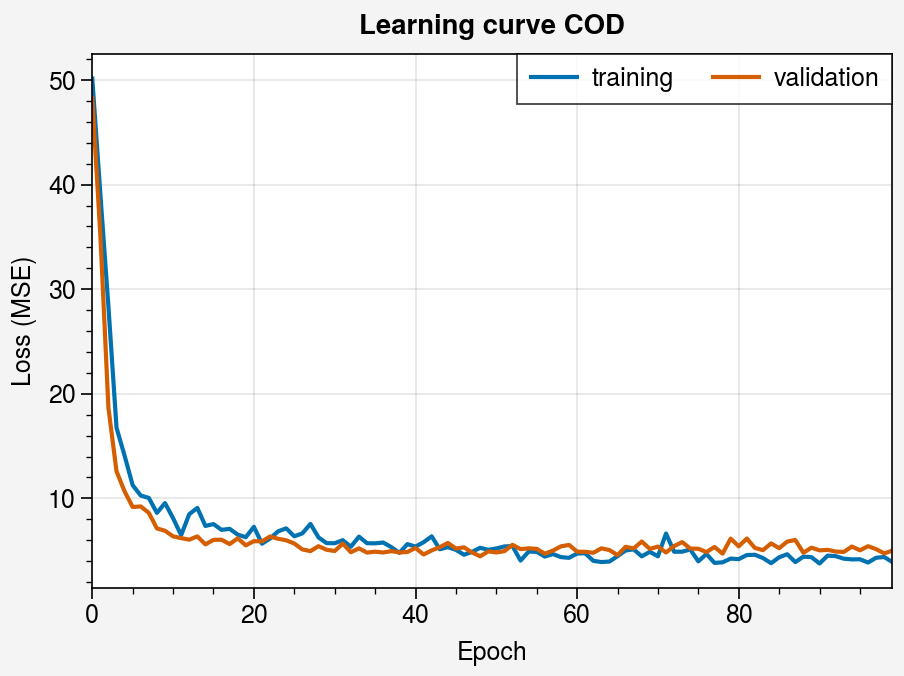

In [45]:
fig, axs = pplt.subplots(ncols=1, nrows=1, refwidth=4, sharey=0, refaspect=1.5)

axs[0].plot(history.history['loss'], label='training')
axs[0].plot(history.history['val_loss'], label='validation')
axs[0].format(xlabel='Epoch', ylabel='Loss (MSE)')
axs[0].legend()

fig.suptitle('Learning curve COD')
# fig.save('../img/learning_curve_MLP2.jpg')

In [46]:
predict_train = model.predict(x_train_arr)
predict_val = model.predict(x_val_arr)

2/2 [==============================] - 0s 2ms/step


In [47]:
stats.linregress(predict_train.squeeze(), y_train_arr.squeeze())

LinregressResult(slope=1.1692342288870698, intercept=-0.632134604103257, rvalue=0.8863450663089372, pvalue=5.868991000269324e-44, stderr=0.05441493731695684, intercept_stderr=0.36283150449648793)

In [48]:
stats.linregress(predict_val.squeeze(), y_val_arr.squeeze())

LinregressResult(slope=1.1816359782853825, intercept=-0.527327676133508, rvalue=0.7934675778737146, pvalue=2.2160868813581785e-10, stderr=0.14154791480472179, intercept_stderr=0.9342097821952945)

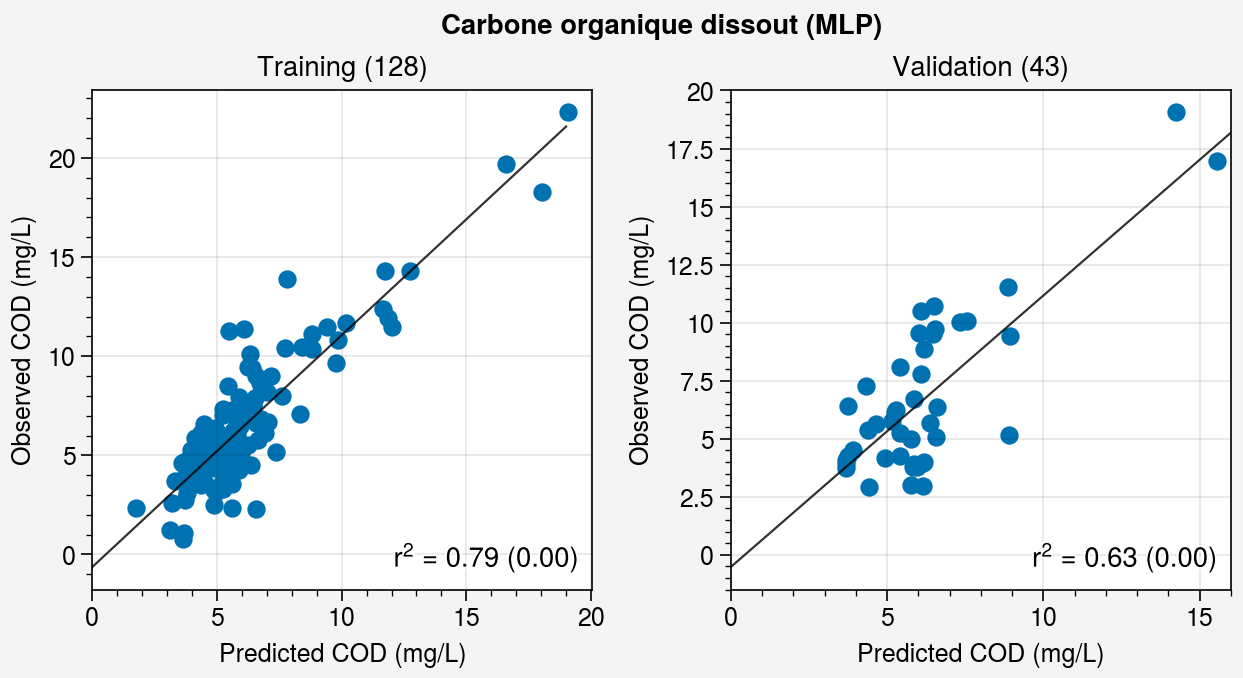

In [52]:
fig, axs = pplt.subplots(ncols=2, share=0)

axs[0].scatter(predict_train, y_train_arr)
axs[1].scatter(predict_val, y_val_arr)

# Make linear trend for models values and compute pearsonr
reg_train = stats.linregress(predict_train.squeeze(), y_train_arr.squeeze())
reg_val = stats.linregress(predict_val.squeeze(), y_val_arr.squeeze())

x = pplt.arange(0, predict_train.max())
y = reg_train.slope*x + reg_train.intercept
axs[0].plot(x, y, 'k-', linewidth=0.8, alpha=0.8)
axs[0].format(lrtitle='$r^2$ = ' + str(round(reg_train.rvalue**2, 2)) + ' (%.2f)' % round(reg_train.pvalue, 2))

x = pplt.arange(0, predict_val.max())
y = reg_train.slope*x + reg_val.intercept
axs[1].plot(x, y, 'k-', linewidth=0.8, alpha=0.8)
axs[1].format(lrtitle='$r^2$ = ' + str(round(reg_val.rvalue**2, 2)) + ' (%.2f)' % round(reg_val.pvalue, 2))

axs[0].format(title='Training (128)', xlabel='Predicted COD (mg/L)', ylabel='Observed COD (mg/L)')
axs[1].format(title='Validation (43)', xlabel='Predicted COD (mg/L)', ylabel='Observed COD (mg/L)')

fig.suptitle('Carbone organique dissout (MLP)')
fig.save('../img/corr_MLP2.jpg')


